# Engine Energy Prediction using Multiple Regression Models

## Project Overview
This notebook predicts engine power output (PE) using multiple regression models.

**Features:**
- AT: Ambient Temperature
- V: Exhaust Vacuum
- AP: Ambient Pressure
- RH: Relative Humidity

**Target:**
- PE: Power Energy Output

**Models Used:**
1. Linear Regression
2. Decision Tree Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. Support Vector Regression (SVR)

## 1. Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Load and Explore Dataset

In [2]:
# Load dataset
df = pd.read_csv('dataset.csv')

print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\n📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\n" + "="*60)
print("FIRST 5 ROWS")
print("="*60)
display(df.head())

print("\n" + "="*60)
print("DATASET INFO")
print("="*60)
df.info()

DATASET OVERVIEW

📊 Dataset Shape: 9568 rows × 5 columns

FIRST 5 ROWS


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90



DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


## 3. Exploratory Data Analysis (EDA)

In [3]:
# Statistical Summary
print("="*60)
print("STATISTICAL SUMMARY")
print("="*60)
display(df.describe())

STATISTICAL SUMMARY


,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [4]:
# Check for missing values
print("="*60)
print("MISSING VALUES CHECK")
print("="*60)
missing = df.isnull().sum()
print(missing)
if missing.sum() == 0:
    print("\n✅ No missing values found!")
else:
    print(f"\n⚠️ Total missing values: {missing.sum()}")

MISSING VALUES CHECK
AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

✅ No missing values found!


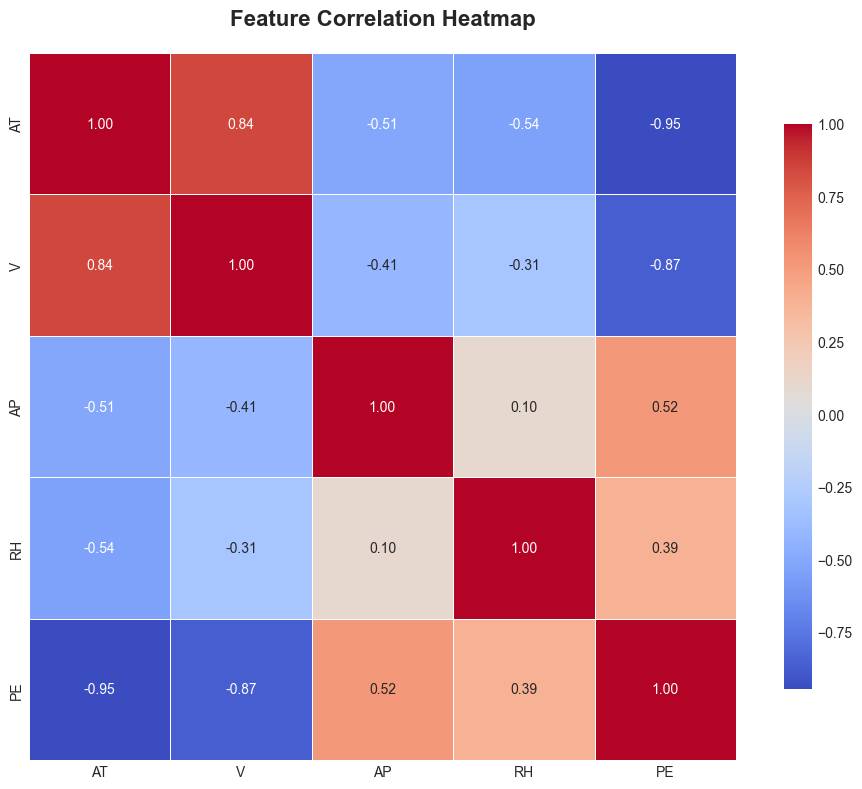


📊 Correlation with Target (PE):
AP        :  0.518
RH        :  0.390
V         : -0.870
AT        : -0.948


In [5]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📊 Correlation with Target (PE):")
print("="*40)
target_corr = correlation_matrix['PE'].sort_values(ascending=False)
for feature, corr in target_corr.items():
    if feature != 'PE':
        print(f"{feature:10s}: {corr:6.3f}")

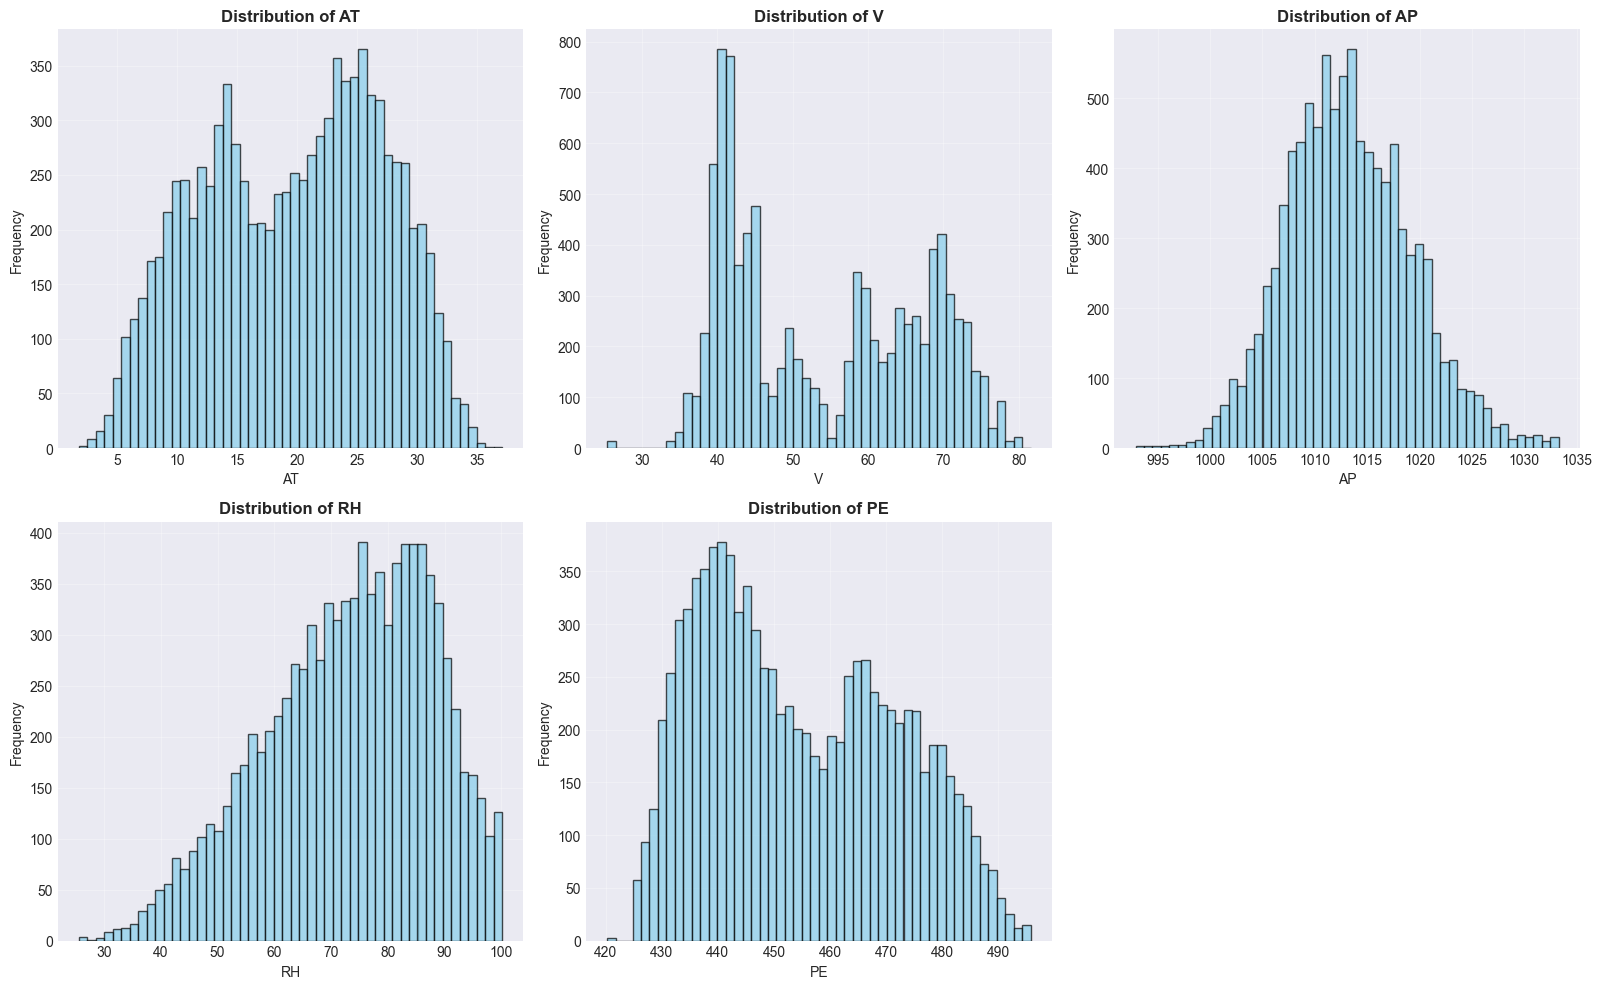

In [6]:
# Feature Distributions
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, column in enumerate(df.columns):
    axes[idx].hist(df[column], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {column}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(column, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(True, alpha=0.3)

# Remove the extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

🔄 Generating pairplot...


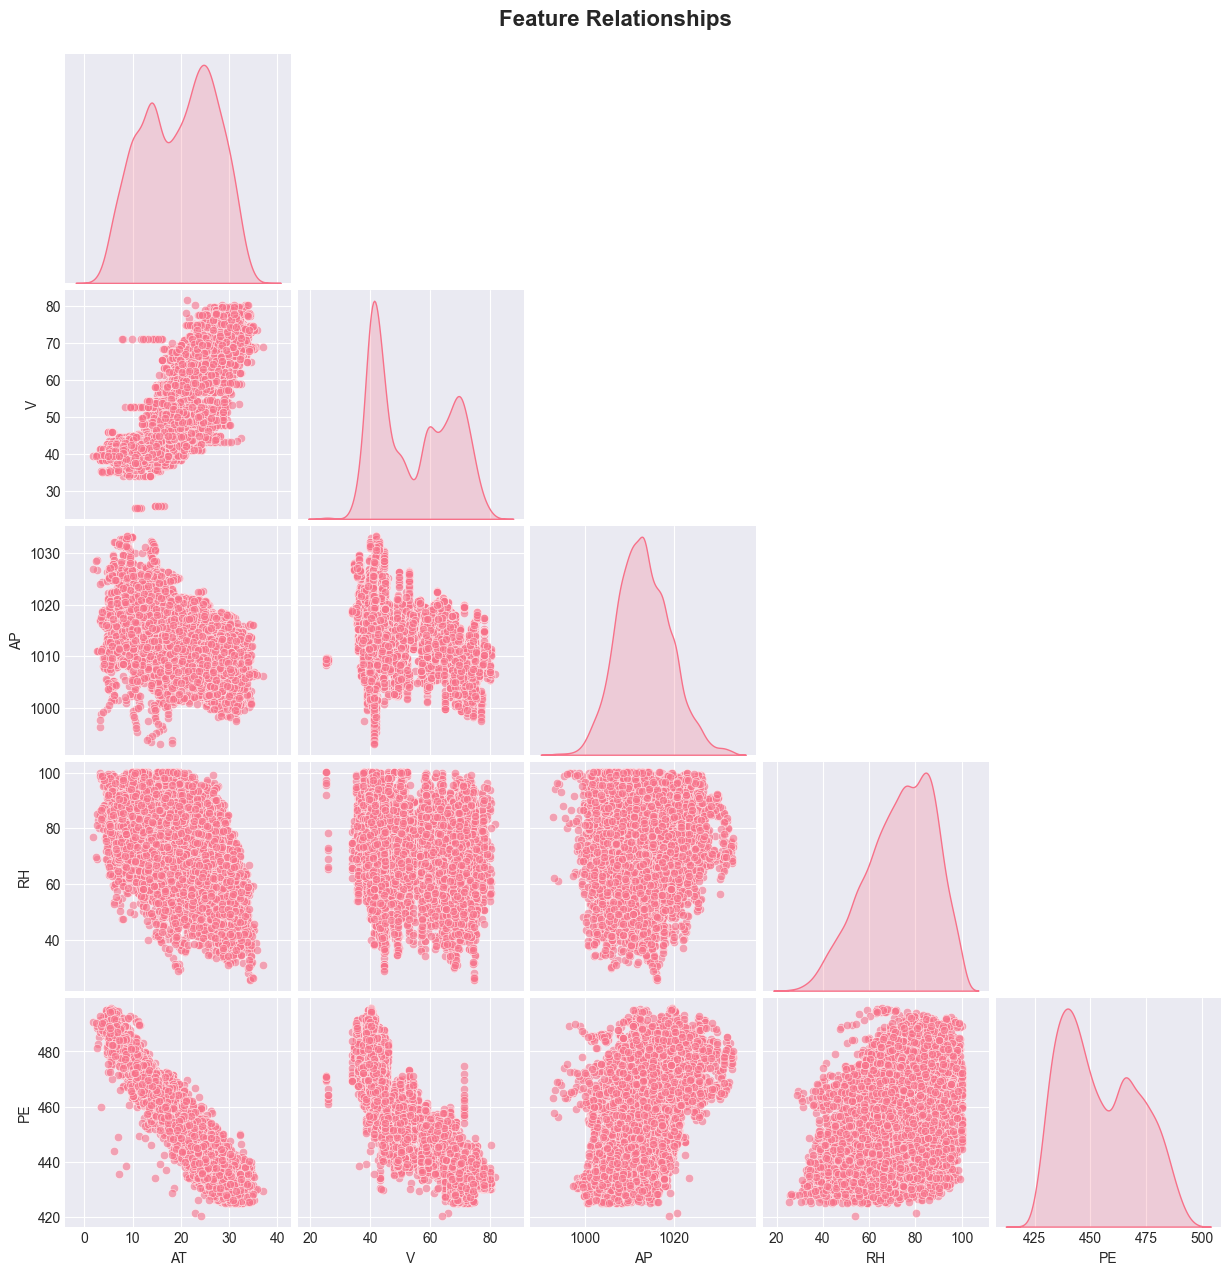

In [7]:
# Pairplot for relationships
print("🔄 Generating pairplot...")
sns.pairplot(df, diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Feature Relationships', y=1.02, fontsize=16, fontweight='bold')
plt.show()

## 4. Data Preprocessing

In [8]:
# Separate features and target
X = df.drop('PE', axis=1)
y = df['PE']

print("="*60)
print("FEATURE & TARGET SEPARATION")
print("="*60)
print(f"\n✅ Features (X): {X.shape}")
print(f"✅ Target (y): {y.shape}")
print("\nFeature columns:", list(X.columns))

FEATURE & TARGET SEPARATION

✅ Features (X): (9568, 4)
✅ Target (y): (9568,)

Feature columns: ['AT', 'V', 'AP', 'RH']


In [9]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("="*60)
print("TRAIN-TEST SPLIT (80-20)")
print("="*60)
print(f"\n📊 Training Set: {X_train.shape[0]} samples")
print(f"📊 Testing Set:  {X_test.shape[0]} samples")

TRAIN-TEST SPLIT (80-20)

📊 Training Set: 7654 samples
📊 Testing Set:  1914 samples


In [10]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("="*60)
print("FEATURE SCALING (StandardScaler)")
print("="*60)
print("\n✅ Features scaled successfully!")
print("\nScaling Statistics:")
print(f"Mean: {scaler.mean_}")
print(f"Std:  {scaler.scale_}")

FEATURE SCALING (StandardScaler)

✅ Features scaled successfully!

Scaling Statistics:
Mean: [  19.62394434   54.2634544  1013.25491769   73.34440031]
Std:  [ 7.43437719 12.70880535  5.94502983 14.62324829]


## 5. Model Training - Multiple Regression Models

### 5.1 Linear Regression

In [11]:
# Linear Regression Model
print("="*60)
print("MODEL 1: LINEAR REGRESSION")
print("="*60)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

print("\n✅ Model trained successfully!")

MODEL 1: LINEAR REGRESSION

✅ Model trained successfully!


### 5.2 Decision Tree Regression

In [12]:
# Decision Tree Regression Model
print("="*60)
print("MODEL 2: DECISION TREE REGRESSION")
print("="*60)

dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

print("\n✅ Model trained successfully!")

MODEL 2: DECISION TREE REGRESSION

✅ Model trained successfully!


### 5.3 Random Forest Regression

In [13]:
# Random Forest Regression Model
print("="*60)
print("MODEL 3: RANDOM FOREST REGRESSION")
print("="*60)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

print("\n✅ Model trained successfully!")

MODEL 3: RANDOM FOREST REGRESSION

✅ Model trained successfully!


### 5.4 Gradient Boosting Regression

In [14]:
# Gradient Boosting Regression Model
print("="*60)
print("MODEL 4: GRADIENT BOOSTING REGRESSION")
print("="*60)

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5, learning_rate=0.1)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)

print("\n✅ Model trained successfully!")

MODEL 4: GRADIENT BOOSTING REGRESSION

✅ Model trained successfully!


### 5.5 Support Vector Regression (SVR)

In [15]:
# Support Vector Regression Model
print("="*60)
print("MODEL 5: SUPPORT VECTOR REGRESSION (SVR)")
print("="*60)

svr_model = SVR(kernel='rbf', C=100, gamma=0.1)
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)

print("\n✅ Model trained successfully!")

MODEL 5: SUPPORT VECTOR REGRESSION (SVR)

✅ Model trained successfully!


## 6. Model Evaluation & Comparison

In [16]:
# Function to calculate all metrics
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    return {
        'Model': model_name,
        'R² Score': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

# Evaluate all models
results = []
results.append(evaluate_model(y_test, lr_pred, 'Linear Regression'))
results.append(evaluate_model(y_test, dt_pred, 'Decision Tree'))
results.append(evaluate_model(y_test, rf_pred, 'Random Forest'))
results.append(evaluate_model(y_test, gb_pred, 'Gradient Boosting'))
results.append(evaluate_model(y_test, svr_pred, 'SVR'))

# Create comparison DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('R² Score', ascending=False).reset_index(drop=True)

print("="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
display(results_df.style.highlight_max(subset=['R² Score'], color='lightgreen')
                        .highlight_min(subset=['MAE', 'MSE', 'RMSE'], color='lightgreen')
                        .format({'R² Score': '{:.6f}', 'MAE': '{:.4f}', 'MSE': '{:.4f}', 'RMSE': '{:.4f}'}))

# Identify best model
best_model_name = results_df.iloc[0]['Model']
best_r2 = results_df.iloc[0]['R² Score']

print("\n" + "="*80)
print(f"🏆 BEST MODEL: {best_model_name} with R² Score = {best_r2:.6f}")
print("="*80)

MODEL PERFORMANCE COMPARISON


,Model,R² Score,MAE,MSE,RMSE
0,Random Forest,0.963212,2.3610,10.6707,3.2666
1,Gradient Boosting,0.959038,2.5929,11.8814,3.4469
2,SVR,0.943903,3.0841,16.2713,4.0338
3,Decision Tree,0.940859,2.9135,17.1545,4.1418
4,Linear Regression,0.930105,3.5959,20.2737,4.5026



🏆 BEST MODEL: Random Forest with R² Score = 0.963212


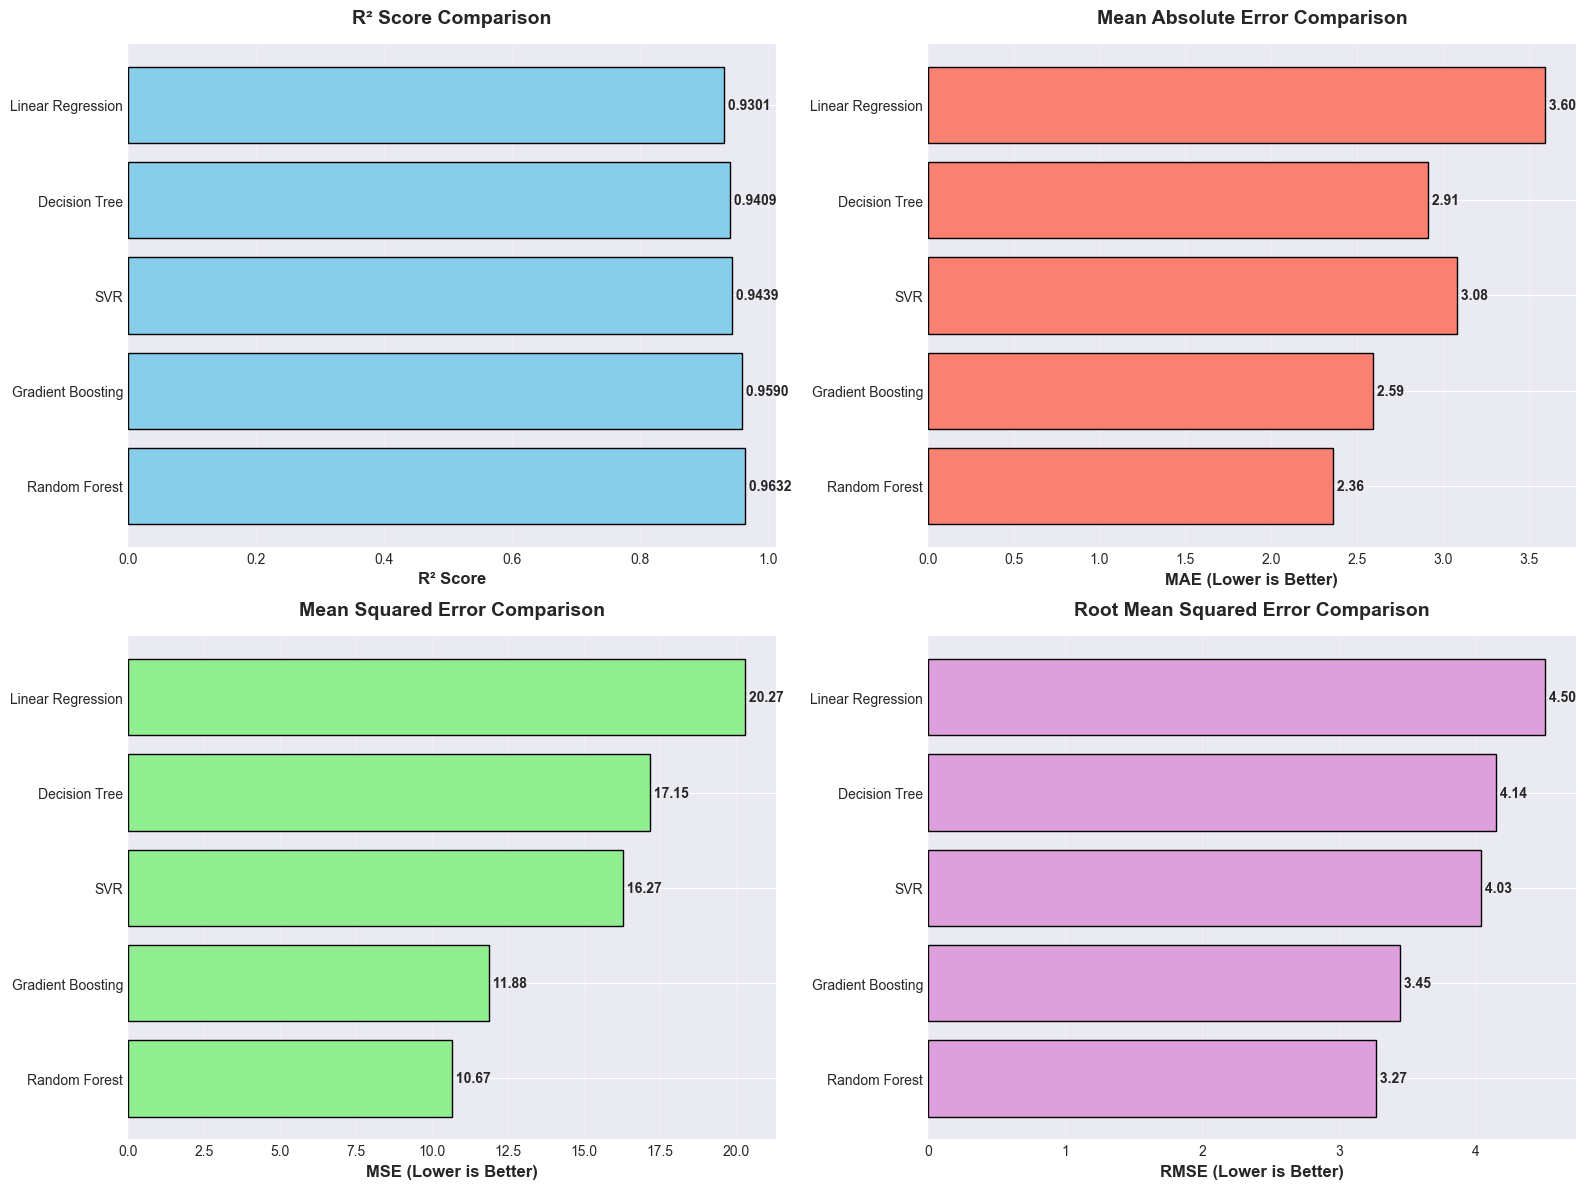

In [17]:
# Visualize Model Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# R² Score Comparison
axes[0, 0].barh(results_df['Model'], results_df['R² Score'], color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('R² Score', fontsize=12, fontweight='bold')
axes[0, 0].set_title('R² Score Comparison', fontsize=14, fontweight='bold', pad=15)
axes[0, 0].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(results_df['R² Score']):
    axes[0, 0].text(v, i, f' {v:.4f}', va='center', fontweight='bold')

# MAE Comparison
axes[0, 1].barh(results_df['Model'], results_df['MAE'], color='salmon', edgecolor='black')
axes[0, 1].set_xlabel('MAE (Lower is Better)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Mean Absolute Error Comparison', fontsize=14, fontweight='bold', pad=15)
axes[0, 1].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(results_df['MAE']):
    axes[0, 1].text(v, i, f' {v:.2f}', va='center', fontweight='bold')

# MSE Comparison
axes[1, 0].barh(results_df['Model'], results_df['MSE'], color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('MSE (Lower is Better)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Mean Squared Error Comparison', fontsize=14, fontweight='bold', pad=15)
axes[1, 0].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(results_df['MSE']):
    axes[1, 0].text(v, i, f' {v:.2f}', va='center', fontweight='bold')

# RMSE Comparison
axes[1, 1].barh(results_df['Model'], results_df['RMSE'], color='plum', edgecolor='black')
axes[1, 1].set_xlabel('RMSE (Lower is Better)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Root Mean Squared Error Comparison', fontsize=14, fontweight='bold', pad=15)
axes[1, 1].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(results_df['RMSE']):
    axes[1, 1].text(v, i, f' {v:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

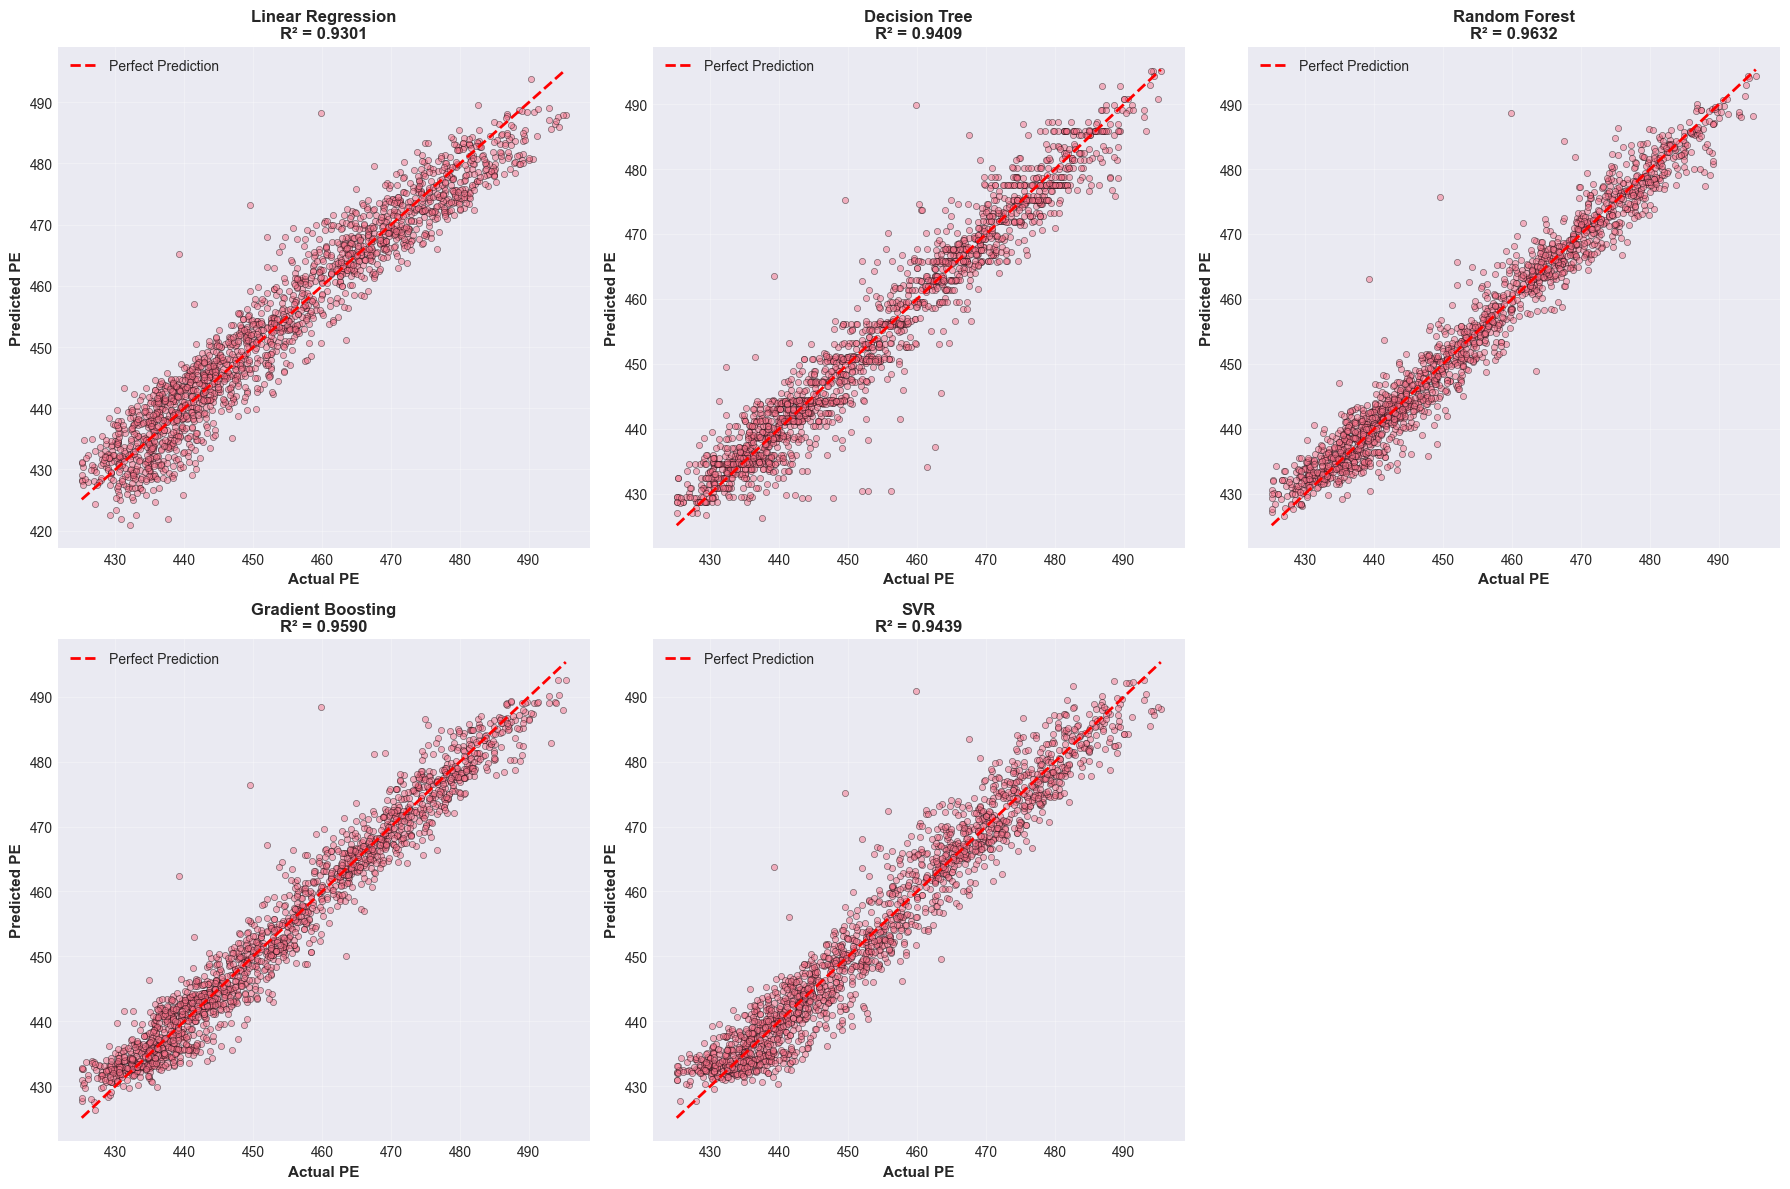

In [18]:
# Actual vs Predicted Plots for All Models
predictions = {
    'Linear Regression': lr_pred,
    'Decision Tree': dt_pred,
    'Random Forest': rf_pred,
    'Gradient Boosting': gb_pred,
    'SVR': svr_pred
}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (model_name, pred) in enumerate(predictions.items()):
    axes[idx].scatter(y_test, pred, alpha=0.5, s=20, edgecolors='black', linewidths=0.5)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                   'r--', lw=2, label='Perfect Prediction')
    axes[idx].set_xlabel('Actual PE', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Predicted PE', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{model_name}\nR² = {r2_score(y_test, pred):.4f}', 
                       fontsize=12, fontweight='bold')
    axes[idx].legend(loc='upper left')
    axes[idx].grid(True, alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

## 7. Interactive Prediction System

In [19]:
# Select the best model for predictions
model_mapping = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'SVR': svr_model
}

best_model = model_mapping[best_model_name]

print("="*80)
print("PREDICTION SYSTEM READY")
print("="*80)
print(f"\n🎯 Using Best Model: {best_model_name}")
print(f"🎯 R² Score: {best_r2:.6f}")

PREDICTION SYSTEM READY

🎯 Using Best Model: Random Forest
🎯 R² Score: 0.963212


In [20]:
# Prediction Function
def predict_energy(AT, V, AP, RH):
    """
    Predict engine energy output based on input features
    
    Parameters:
    -----------
    AT : float - Ambient Temperature (°C)
    V  : float - Exhaust Vacuum (cm Hg)
    AP : float - Ambient Pressure (millibar)
    RH : float - Relative Humidity (%)
    
    Returns:
    --------
    float - Predicted Power Energy (PE)
    """
    # Create input array
    input_data = np.array([[AT, V, AP, RH]])
    
    # Scale the input
    input_scaled = scaler.transform(input_data)
    
    # Make prediction
    prediction = best_model.predict(input_scaled)[0]
    
    print("="*80)
    print("PREDICTION RESULT")
    print("="*80)
    print(f"\n📥 Input Features:")
    print(f"   AT (Ambient Temperature):  {AT:>10.2f} °C")
    print(f"   V  (Exhaust Vacuum):       {V:>10.2f} cm Hg")
    print(f"   AP (Ambient Pressure):     {AP:>10.2f} millibar")
    print(f"   RH (Relative Humidity):    {RH:>10.2f} %")
    print(f"\n📤 Predicted Output:")
    print(f"   PE (Power Energy):         {prediction:>10.2f} MW")
    print(f"\n🤖 Model Used: {best_model_name}")
    print("="*80)
    
    return prediction

print("\n✅ Prediction function created successfully!")
print("\nUsage: predict_energy(AT, V, AP, RH)")


✅ Prediction function created successfully!

Usage: predict_energy(AT, V, AP, RH)


### Example Predictions

In [21]:
# Example 1: Using average values from dataset
print("\n📍 EXAMPLE 1: Using Average Values\n")
avg_AT = df['AT'].mean()
avg_V = df['V'].mean()
avg_AP = df['AP'].mean()
avg_RH = df['RH'].mean()

prediction_1 = predict_energy(avg_AT, avg_V, avg_AP, avg_RH)


📍 EXAMPLE 1: Using Average Values

PREDICTION RESULT

📥 Input Features:
   AT (Ambient Temperature):       19.65 °C
   V  (Exhaust Vacuum):            54.31 cm Hg
   AP (Ambient Pressure):        1013.26 millibar
   RH (Relative Humidity):         73.31 %

📤 Predicted Output:
   PE (Power Energy):             455.38 MW

🤖 Model Used: Random Forest


In [22]:
# Example 2: Custom values
print("\n📍 EXAMPLE 2: Custom Input Values\n")
prediction_2 = predict_energy(AT=15.5, V=60.0, AP=1010.0, RH=75.0)


📍 EXAMPLE 2: Custom Input Values

PREDICTION RESULT

📥 Input Features:
   AT (Ambient Temperature):       15.50 °C
   V  (Exhaust Vacuum):            60.00 cm Hg
   AP (Ambient Pressure):        1010.00 millibar
   RH (Relative Humidity):         75.00 %

📤 Predicted Output:
   PE (Power Energy):             456.43 MW

🤖 Model Used: Random Forest


In [23]:
# Example 3: Another custom prediction
print("\n📍 EXAMPLE 3: Another Custom Input\n")
prediction_3 = predict_energy(AT=25.0, V=70.0, AP=1015.0, RH=50.0)


📍 EXAMPLE 3: Another Custom Input

PREDICTION RESULT

📥 Input Features:
   AT (Ambient Temperature):       25.00 °C
   V  (Exhaust Vacuum):            70.00 cm Hg
   AP (Ambient Pressure):        1015.00 millibar
   RH (Relative Humidity):         50.00 %

📤 Predicted Output:
   PE (Power Energy):             443.33 MW

🤖 Model Used: Random Forest


### User Input Section

**Enter your own values below to get a prediction:**

In [24]:
# USER INPUT: Modify these values and run this cell to get your prediction

# Enter your input values here:
user_AT = 20.0    # Ambient Temperature (°C)
user_V = 55.0     # Exhaust Vacuum (cm Hg)
user_AP = 1013.0  # Ambient Pressure (millibar)
user_RH = 65.0    # Relative Humidity (%)

# Get prediction
print("\n🎯 YOUR PREDICTION:\n")
your_prediction = predict_energy(user_AT, user_V, user_AP, user_RH)


🎯 YOUR PREDICTION:

PREDICTION RESULT

📥 Input Features:
   AT (Ambient Temperature):       20.00 °C
   V  (Exhaust Vacuum):            55.00 cm Hg
   AP (Ambient Pressure):        1013.00 millibar
   RH (Relative Humidity):         65.00 %

📤 Predicted Output:
   PE (Power Energy):             455.70 MW

🤖 Model Used: Random Forest


## 8. Project Summary

In [25]:
print("="*80)
print("PROJECT SUMMARY")
print("="*80)
print(f"\n📊 Dataset: {df.shape[0]} samples, {df.shape[1]} features")
print(f"\n🎯 Target Variable: Power Energy (PE)")
print(f"\n🤖 Models Trained: {len(results_df)}")
print("   1. Linear Regression")
print("   2. Decision Tree Regression")
print("   3. Random Forest Regression")
print("   4. Gradient Boosting Regression")
print("   5. Support Vector Regression (SVR)")
print(f"\n🏆 Best Model: {best_model_name}")
print(f"🏆 Best R² Score: {best_r2:.6f}")
print(f"\n✅ Prediction System: READY")
print("\n📌 To make predictions:")
print("   Use: predict_energy(AT, V, AP, RH)")
print("="*80)
print("\n🎉 PROJECT COMPLETED SUCCESSFULLY! 🎉")
print("="*80)

PROJECT SUMMARY

📊 Dataset: 9568 samples, 5 features

🎯 Target Variable: Power Energy (PE)

🤖 Models Trained: 5
   1. Linear Regression
   2. Decision Tree Regression
   3. Random Forest Regression
   4. Gradient Boosting Regression
   5. Support Vector Regression (SVR)

🏆 Best Model: Random Forest
🏆 Best R² Score: 0.963212

✅ Prediction System: READY

📌 To make predictions:
   Use: predict_energy(AT, V, AP, RH)

🎉 PROJECT COMPLETED SUCCESSFULLY! 🎉
